# Process discriminator

In [1]:
import base

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import process_discriminator

import IPython

In [2]:
from numpy.random import default_rng
rng = default_rng(seed=69)


In [3]:
from scipy.io import wavfile
samplerate, data = wavfile.read('../data/speech_commands_v0.01/bed/00176480_nohash_0.wav')
IPython.display.Audio(data, rate=samplerate)

In [4]:
import os

In [5]:
bed_wav = []

os.listdir('../data/speech_commands_v0.01/bed/')
no_wav = os.listdir('../data/speech_commands_v0.01/no/')

In [6]:
def read_waves_from_dir(dirpath):
    out = []
    
    for file in os.listdir(dirpath):
        _, data = wavfile.read(dirpath + file)
        out.append(data) 
        
    return out  

In [7]:
def time_embed(data):
    assert isinstance(data, np.ndarray)
    out = []
    
    for wave in data:
        out.append(np.c_[np.arange(0, len(wave),1, dtype=float), wave])
    
    return out

In [8]:
bed_wav = read_waves_from_dir('../data/speech_commands_v0.01/bed/')
no_wav = read_waves_from_dir('../data/speech_commands_v0.01/no/')

In [9]:
print('Nr bed commands', len(bed_wav))
print('Nr no commands', len(no_wav))

Nr bed commands 1713
Nr no commands 2375


In [14]:
sample_1_bed = rng.choice(bed_wav, size = 100)
sample_2_bed = rng.choice(bed_wav, size = 100)
sample_1_no = rng.choice(no_wav, size = 100)
sample_2_no = rng.choice(no_wav, size = 100)

/home/ocmob/miniconda3/envs/signatures/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/home/ocmob/miniconda3/envs/signatures/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/home/ocmob/miniconda3/envs/signatures/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with d

In [16]:
sample_1_bed_embedded = time_embed(sample_1_bed)
sample_2_bed_embedded = time_embed(sample_2_bed)
sample_1_no_embedded = time_embed(sample_1_no)
sample_2_no_embedded = time_embed(sample_2_no)

## Apply test

We will now apply the statistical test. We fix the confidence level to 99%.

In [27]:
result = process_discriminator.test(sample_1_bed_embedded, sample_2_bed_embedded, order=3, confidence_level=0.99)
print("Do set1 and set2 come from DIFFERENT distributions? {}".format(result))

Computing signatures of population 1:   0%|          | 0/100 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/100 [00:00<?, ?it/s]

Do set1 and set2 come from DIFFERENT distributions? False


In [28]:
result = process_discriminator.test(sample_1_bed_embedded, sample_2_no_embedded, order=3, confidence_level=0.99)
print("Do set1 and set3 come from DIFFERENT distributions? {}".format(result))

Computing signatures of population 1:   0%|          | 0/100 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/100 [00:00<?, ?it/s]

Do set1 and set3 come from DIFFERENT distributions? False


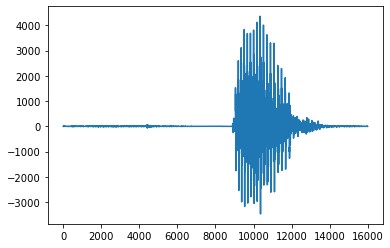

In [25]:
plt.plot(sample_1_bed[3])

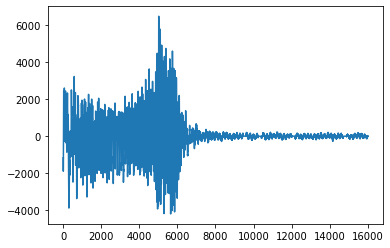

In [26]:
plt.plot(sample_1_no[8])